<a href="https://colab.research.google.com/github/Turkinass/Sentiment_Analyzer/blob/main/Sentiment_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SIC Capstone Project - The Unit (Group 4)
# **Sentiment Analyzer**

### Installing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from google.colab import drive

In [ ]:
df_master = pd.read_csv('https://raw.githubusercontent.com/Turkinass/Sentiment_Analyzer/main/Tweets.csv')


In [ ]:
df_master.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
10107,569534372954681344,negative,1.0000,Cancelled Flight,1.0000,US Airways,NaN,beachylinda,NaN,0,"@USAirways first flight Cancelled Flightled, c...",NaN,2015-02-22 08:29:10 -0800,NaN,NaN
12857,569999295631527937,negative,1.0000,Customer Service Issue,0.6805,American,NaN,waynebevan,NaN,0,@AmericanAir Additional fare cost $19.. Tix ch...,NaN,2015-02-23 15:16:36 -0800,NaN,Alaska
7275,569700499319959553,positive,0.6535,NaN,NaN,Delta,NaN,jabeblanchard,NaN,0,@JetBlue ha ha! Can I get a wake up call at bo...,"[40.89343356, -74.29961359]",2015-02-22 19:29:18 -0800,Right Coast,Eastern Time (US & Canada)
9182,570081206412431360,negative,0.6281,Late Flight,0.6281,US Airways,NaN,CicilyGray,NaN,0,@USAirways flight from Bhm delayed 5hrs! Conne...,NaN,2015-02-23 20:42:05 -0800,NaN,NaN
10765,568896751102533632,neutral,1.0000,NaN,NaN,US Airways,NaN,trevels11,NaN,0,@USAirways Almost home ...East Coast Freeze he...,NaN,2015-02-20 14:15:29 -0800,Terrapin Station,NaN


In [ ]:
df_master.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Data Preprocessing

In [ ]:
print('Number of duplicated values: ', df_master.duplicated().sum())

Number of duplicated values:  36


In [ ]:
df_master.drop_duplicates(inplace = True)

In [ ]:
print('Number of duplicated values: ', df_master.duplicated().sum())

Number of duplicated values:  0


In [ ]:
df_master.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df_master.shape

(14604, 15)

In [ ]:
# tokenizing the sentiments
sentiment_conditions = [
    (df_master['airline_sentiment'] == 'negative'),
    (df_master['airline_sentiment'] == 'neutral'),
    (df_master['airline_sentiment'] == 'positive')
    ]

values = [0, 1, 2]

df_master['label'] = np.select(sentiment_conditions, values)

In [ ]:
df_master.label.value_counts()

0    9159
1    3091
2    2354
Name: label, dtype: int64

In [ ]:
# removing unneeded columns
df_master.drop(df_master.columns.difference(['airline_sentiment','text', 'label']), 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
df_master.head(200)

,airline_sentiment,text,label
0,neutral,@VirginAmerica What @dhepburn said.,1
1,positive,@VirginAmerica plus you've added commercials t...,2
2,neutral,@VirginAmerica I didn't today... Must mean I n...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
...,...,...,...
195,negative,@VirginAmerica Because we never rec'd Cancelle...,0
196,negative,@VirginAmerica trying to book a flight &amp; y...,0
197,negative,@VirginAmerica You have any flights flying int...,0
198,negative,@VirginAmerica you stink. Flight Cancelled Fli...,0


In [ ]:
df_master.label.value_counts()

0    9159
1    3091
2    2354
Name: label, dtype: int64

### Data Modelling

In [ ]:
X = df_master['text']
y = df_master['label']

In [ ]:
#Combine two dataframes (Done)
#labeling (Done)
#Drop unneeded columns (Done)
#Tokenazation (Done)
#Splitting (Done)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)



In [ ]:
# hyperparameters
epochs = 30
vocab_size = 10000
max_length = 100
n_dim = 16
training_size = X_train.shape[0]

In [ ]:
tokenizer = Tokenizer(oov_token='<OOV>') #replaces words absent from corpus with <OOV> to keep text length
tokenizer.fit_on_texts(X_train)

# representing each text as a sequence of tokens
train_sequence = tokenizer.texts_to_sequences(X_train)

# padding each sequence with trailing zeros so that all sequence have same length
train_pad = pad_sequences(train_sequence, maxlen=max_length, padding='post', truncating='post')

test_sequence = tokenizer.texts_to_sequences(X_test)
test_pad = pad_sequences(test_sequence, maxlen=max_length, padding='post', truncating='post')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, n_dim, input_length=max_length),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(loss='binary_crossentropy',optimizer='nadam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 16)          0         
 ropout1D)                                                       
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_pad, y_train, epochs=epochs, validation_data=(test_pad, y_test), verbose=2)

Epoch 1/30
366/366 - 6s - loss: 0.9349 - accuracy: 0.5873 - val_loss: 0.5879 - val_accuracy: 0.5423 - 6s/epoch - 18ms/step
Epoch 2/30
366/366 - 2s - loss: 0.3610 - accuracy: 0.4936 - val_loss: -1.6189e-01 - val_accuracy: 0.4810 - 2s/epoch - 6ms/step
Epoch 3/30
366/366 - 2s - loss: -1.3902e-01 - accuracy: 0.5639 - val_loss: -3.0061e-01 - val_accuracy: 0.6142 - 2s/epoch - 5ms/step
Epoch 4/30
366/366 - 2s - loss: -3.8590e-01 - accuracy: 0.5898 - val_loss: -6.9477e-01 - val_accuracy: 0.5751 - 2s/epoch - 6ms/step
Epoch 5/30
366/366 - 2s - loss: -5.5750e-01 - accuracy: 0.5523 - val_loss: -7.8325e-01 - val_accuracy: 0.5988 - 2s/epoch - 5ms/step
Epoch 6/30
366/366 - 2s - loss: -7.6080e-01 - accuracy: 0.6026 - val_loss: -8.2421e-01 - val_accuracy: 0.6036 - 2s/epoch - 5ms/step
Epoch 7/30
366/366 - 2s - loss: -7.8661e-01 - accuracy: 0.5945 - val_loss: -8.3845e-01 - val_accuracy: 0.6121 - 2s/epoch - 5ms/step
Epoch 8/30
366/366 - 2s - loss: -8.1773e-01 - accuracy: 0.6148 - val_loss: -8.6937e-01 - v

### The results

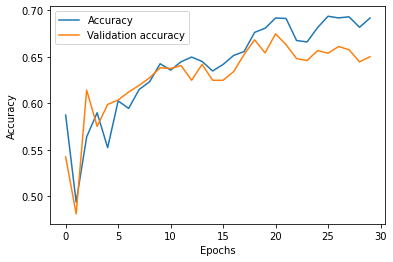

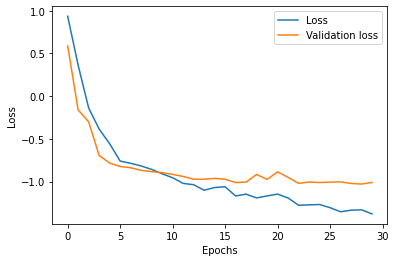

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation accuracy'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend(['Loss','Validation loss'])
plt.show()